<a href="https://colab.research.google.com/github/shirleyzz/cap5610_machineleanrning/blob/master/HW5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import tensorflow as tf
import keras
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers

# load train and test data
(train_images_original, train_labels_original), (test_images_original, test_labels_original) = mnist.load_data()
# preprocess data
train_images = train_images_original.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255
test_images = test_images_original.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255
#put label into 10 classes
train_labels = to_categorical(train_labels_original, num_classes=10) 
test_labels = to_categorical(test_labels_original, num_classes=10)

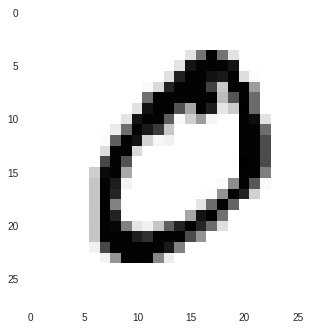

In [185]:
#have a look at label 0
import matplotlib.pyplot as plt
plt.imshow(train_images_original[1])
plt.grid(None)
plt.show()

In [0]:
#round the grey values of the images to 1 and 0 to obtain black and white images
x_train = ((train_images_original/255)<0.5)*1
x_test = ((test_images_original/255)<0.5)*1

In [0]:
# program to count islands in the matrix in the training and test set
class Matrix: 
	def __init__(self, n_samples, n_features, graph): 
		self.n_samples = n_samples 
		self.n_features = n_features
		self.graph = graph

	# return row number is in range, column number is in range and value is 1 and not yet visited 
	def Pixel_visited(self, i, j, visited): 
		
		return (i >= 0 and i < self.n_samples and
				j >= 0 and j < self.n_features and
				not visited[i][j] and self.graph[i][j]) 
			

	# return 8 neighbours as adjacent vertices of a matrix
	def find_adjacent_vertices(self, i, j, visited): 

		# array defines 8 neighbours of a given pixel 
		rowNbr = [-1, -1, -1, 0, 0, 1, 1, 1]; 
		colNbr = [-1, 0, 1, -1, 1, -1, 0, 1]; 
		
		visited[i][j] = True
		for k in range(8): 
			if self.Pixel_visited(i + rowNbr[k], j + colNbr[k], visited): 
				self.find_adjacent_vertices(i + rowNbr[k], j + colNbr[k], visited) 


	# return count of islands in a given matrix 
	def countIslands(self): 
		# initialize unvisited pixels 
		visited = [[False for j in range(self.n_features)]for i in range(self.n_samples)] 
		count = 0
		for i in range(self.n_samples): 
			for j in range(self.n_features): 
				if visited[i][j] == False and self.graph[i][j] ==1: 
					self.find_adjacent_vertices(i, j, visited) 
					count += 1
		return count 

In [0]:
#a group of connected 1's forms an island
#this function will return number of islands
def find_island(graph):
  num_row = len(graph) 
  num_col = len(graph[0]) 
  m= Matrix(num_row, num_col, graph) 
  num_island = m.countIslands()
  #print("Number of islands is:")
  #print(str(num_island))
  return num_island
#this function will add a new feature denoting numeber of white areas
def add_feature(X):
  n_samples = X.shape[0]
  new_column = np.zeros((n_samples,1))
  for item in range(n_samples):
    new_column[item,0] = find_island(X[item])
  #print(X.shape)
  #print(new_column)
  X_new = X.reshape(X.shape[0], -1)/255
  X_new = np.append(X_new, new_column/3, axis = 1)
  #print(X_new.shape)
#   X.append()
  return X_new

In [0]:
# add_feature(x_train)

In [0]:
# flag = ((train_images_original/255)>0.5)*1
# print(flag.shape)
# x_train_dfs = flag.reshape(flag.shape[0], -1)/255
# print(x_train_dfs.shape)

In [0]:
# x_train_dfs = np.append(x_train_dfs, white_area/3, axis = 1)

In [192]:
# find_island(x_train[17])
X_train = add_feature(x_train)
X_test = add_feature(x_test)  

(60000, 785)
(10000, 785)
(60000, 785)
(10000, 785)


In [193]:
# set up layers,and now it has 785 dims
model = keras.Sequential([
    keras.layers.Dense(10, input_dim=785, activation=tf.nn.softmax)
])

sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
# compile the model
model.compile(optimizer=sgd, loss='categorical_crossentropy',metrics=['accuracy'])

# train the model
epochs = 20
history = model.fit(X_train, 
                      train_labels, 
                      epochs=epochs,  
                      validation_data=(X_test, test_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 3s 50us/step - loss: 2.1663 - acc: 0.1957 - val_loss: 2.0793 - val_acc: 0.2047
Epoch 2/20
60000/60000 [==============================] - 3s 47us/step - loss: 2.0335 - acc: 0.2057 - val_loss: 2.0007 - val_acc: 0.2047
Epoch 3/20
60000/60000 [==============================] - 3s 47us/step - loss: 1.9769 - acc: 0.2174 - val_loss: 1.9605 - val_acc: 0.2746
Epoch 4/20
60000/60000 [==============================] - 3s 48us/step - loss: 1.9450 - acc: 0.2480 - val_loss: 1.9362 - val_acc: 0.3349
Epoch 5/20
60000/60000 [==============================] - 3s 47us/step - loss: 1.9244 - acc: 0.2711 - val_loss: 1.9187 - val_acc: 0.2442
Epoch 6/20
60000/60000 [==============================] - 3s 47us/step - loss: 1.9096 - acc: 0.2919 - val_loss: 1.9074 - val_acc: 0.2567
Epoch 7/20
60000/60000 [==============================] - 3s 47us/step - loss: 1.8988 - acc: 0.2880 - val_loss: 1.8973 - val_acc

In [194]:
history.history

{'acc': [0.1957,
  0.2057,
  0.21738333333333335,
  0.24796666666666667,
  0.2711166666666667,
  0.2919333333333333,
  0.28795,
  0.2977666666666667,
  0.31178333333333336,
  0.3042,
  0.32126666666666664,
  0.32738333333333336,
  0.32826666666666665,
  0.3425,
  0.34235,
  0.36083333333333334,
  0.3704,
  0.3879166666666667,
  0.3798666666666667,
  0.38511666666666666],
 'loss': [2.1662829607645673,
  2.0335128317515054,
  1.976919800122579,
  1.9449787466049195,
  1.924388941192627,
  1.9096143978754678,
  1.8987706876118977,
  1.8901515231450399,
  1.8828890693028768,
  1.8768628945668537,
  1.871312940533956,
  1.8665843614578248,
  1.8621633287429809,
  1.8581748869578043,
  1.854205600420634,
  1.8506113716761272,
  1.8471367014567057,
  1.8438809799830118,
  1.8405967514673869,
  1.837410504468282],
 'val_acc': [0.2047,
  0.2047,
  0.2746,
  0.3349,
  0.2442,
  0.2567,
  0.2611,
  0.2446,
  0.2441,
  0.3797,
  0.3542,
  0.2826,
  0.3397,
  0.244,
  0.3715,
  0.3445,
  0.3822,
  

{'acc': [0.19551666666666667,
  0.20443333333333333,
  0.2198,
  0.2509166666666667,
  0.2716,
  0.29115,
  0.29241666666666666,
  0.29645,
  0.30543333333333333,
  0.31526666666666664,
  0.3198166666666667,
  0.31775,
  0.3298833333333333,
  0.3449833333333333,
  0.3497166666666667,
  0.35285,
  0.3613,
  0.3628,
  0.37511666666666665,
  0.37346666666666667],
 'loss': [2.167491558329264,
  2.0341448680241903,
  1.9772604178746542,
  1.9451881295522053,
  1.9246181710561117,
  1.909946807161967,
  1.8990876845677693,
  1.8903922624588012,
  1.8832114404042561,
  1.8770915699005126,
  1.8716763350168864,
  1.8668879015604656,
  1.8624968674341837,
  1.8584395546595256,
  1.8544686367670695,
  1.8509653816223144,
  1.8474664658228557,
  1.8441604709625243,
  1.8409622159957886,
  1.837740297762553],
 'val_acc': [0.2047,
  0.2047,
  0.3587,
  0.244,
  0.292,
  0.3076,
  0.3725,
  0.3065,
  0.3061,
  0.3832,
  0.244,
  0.3671,
  0.3252,
  0.2524,
  0.3428,
  0.2851,
  0.2908,
  0.4892,
  0

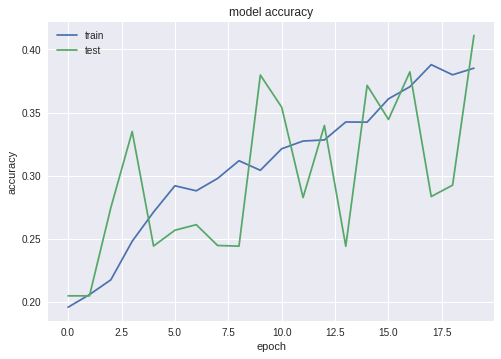

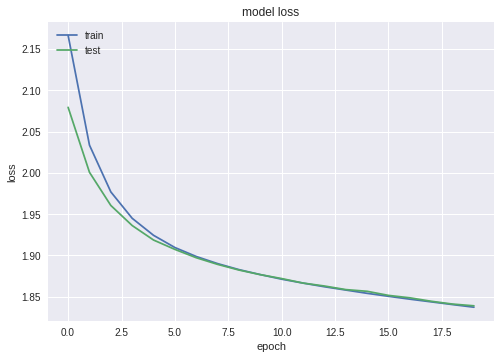

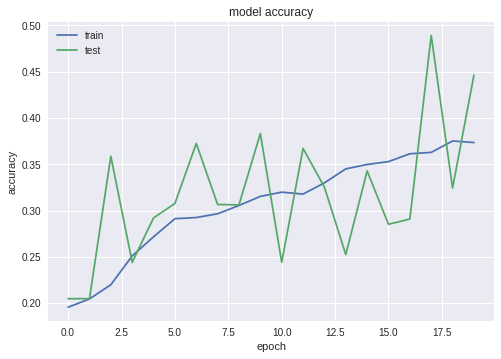

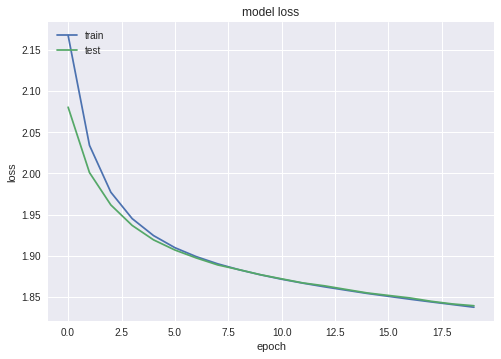

In [195]:
# summarize history for accuracy
import matplotlib.pyplot as plt
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [196]:
train_images.shape

(60000, 784)

(60000, 784)

In [197]:
train_images.shape

(60000, 784)

(60000, 784)

In [198]:
train_images_original.shape

(60000, 28, 28)

(60000, 28, 28)

In [0]:
# train_images_original[:5]

In [0]:
x_train = ((train_images_original/255)>0.5)*1

In [201]:
#train_images_original[17]
np.unique(x_train[17])

array([0, 1])

array([0, 1])